# Basic Linear Regression Model with Scikit-Learn

In [1]:
# Import libraries for data cleaning, exploration, and visualisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# I have placed the datasets in a folder named "datasets"
# Read the training data for the model
train_df = pd.read_csv("datasets/train.csv")

# Look at the first 5 rows to see if the file has been read correctly
train_df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
# Read the testing data for the model
test_df = pd.read_csv("datasets/test.csv")

# Look at the first 5 rows to see if the file has been read correctly
test_df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


## Basic Data Exploration and Data Cleaning
### Training Data

In [4]:
# How many rows and columns do we have for the training data?
train_df.shape

(700, 2)

In [5]:
# Check that the datatypes in the df are suitable for the data
train_df.dtypes

x    float64
y    float64
dtype: object

In [6]:
# How many missing values do we have?
train_df.isnull().sum()

x    0
y    1
dtype: int64

In [7]:
# Which row has our missing value?
train_df[train_df["y"].isnull()]

,x,y
213,3530.157369,NaN


In [8]:
# Remove the missing value from the data
train_df = train_df.dropna()

In [9]:
# Check if there are any more missing values
train_df.isnull().any()

x    False
y    False
dtype: bool

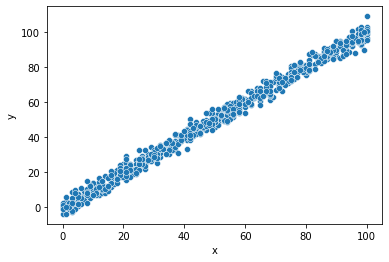

In [10]:
# Use Seaborn to plot a scatter plot of the training data
sns.scatterplot(x="x", y="y", data=train_df);

There do not seem to be any outliers (except for possibly the x value that has the highest y value), the plot seems to linear in nature, and reasonably consistent spread of data points. This means that our data is suitable for a linear regression as it satisfies the linear assumptions. 

### Testing Data

In [11]:
# How many testing values do we have compared to the training data
test_df.shape

(300, 2)

So we originally had 700 rows in our training data (now 699) while there are 300 rows of testing data. This means that our data is roughly 70-30 which is a reasonable split.

In [12]:
# Summary statistics of the test data
test_df.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [13]:
# Make sure the datatypes in the testing data are also correct
test_df.dtypes

x      int64
y    float64
dtype: object

It seems that the x values for the testing data are all integers compared to the training data's x values which where floats.

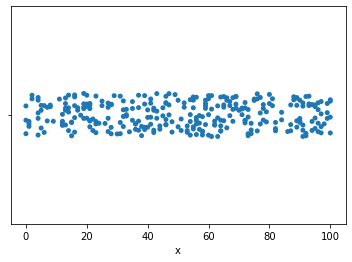

In [14]:
# Check the spread of the testing data's x values
sns.stripplot(x="x", data=test_df);

In [15]:
# Check no missing values
test_df.isnull().any()

x    False
y    False
dtype: bool

## Model Building Time

In [16]:
# Import the linear regression model from scikit learn which is the library I'll be using
from sklearn.linear_model import LinearRegression

In [17]:
# To make the using the data easier, create more intuitive variable names for testing and training features and targets
X_train, y_train, X_test, y_test = train_df[["x"]], train_df["y"], test_df[["x"]], test_df["y"]

In [18]:
# Check head of training features is correct
X_train.head()

,x
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0


In [19]:
# Check head of training targets is correct
y_train.head()

0    21.549452
1    47.464463
2    17.218656
3    36.586398
4    87.288984
Name: y, dtype: float64

In [20]:
# Check head of testing features is correct
X_test.head()

,x
0,77
1,21
2,22
3,20
4,36


In [21]:
# Check head of testing targets is correct
y_test.head()

0    79.775152
1    23.177279
2    25.609262
3    17.857388
4    41.849864
Name: y, dtype: float64

In [22]:
# Create the linear regression model object
model = LinearRegression()
model

LinearRegression()

In [23]:
# Fit (train) the model with the training features and training targets
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# After the model has been trained, what is the coefficient of the regression model
model.coef_

array([1.00065638])

In [25]:
# What about the intercept?
model.intercept_

-0.10726546430097272

Data's line of best fit according to the linear regression model: 
```
y = 1.00065638x - 0.1072655
```
Which means that every time `x` increases by 1 unit, `y` increases by 1.00065638 units.

## Model Evaluation

In [26]:
# Import mean square error and R^2 metrics from scikit learn
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# To evaluate the model, we compare the predicted values that are outputted by the model when run on the testing features with the true values
y_pred = model.predict(X_test)
y_pred

array([76.94327594, 20.90651855, 21.90717494, 19.90586217, 35.91636428,
       14.90258026, 61.93343021, 94.95509081, 19.90586217,  4.89601644,
        3.89536006, 18.90520579, 95.95574719, 61.93343021, 35.91636428,
       14.90258026, 64.93539936, 13.90192388, 86.94983976, 68.93802488,
       88.95115252, 50.92621001, 88.95115252, 26.91045685, 96.95640358,
       57.93080468, 78.9445887 , 20.90651855, 92.95377805, 26.91045685,
       98.95771634, 30.91308237, 32.91439514, 79.94524508, 27.91111323,
       46.92358448, 52.92752277, 68.93802488, 27.91111323, 32.91439514,
       90.95246528, 70.93933765, 49.92555363, 75.94261956,  3.89536006,
       36.91702066, 69.93868127, 67.9373685 , 39.91898981, 34.9157079 ,
       93.95443443, 87.95049614, 51.92686639, 30.91308237, 58.93146107,
       -0.10726546, 38.91833343, 63.93474297, 68.93802488, 56.9301483 ,
       12.9012675 , 71.93999403, 75.94261956, 60.93277383, 81.94655785,
       17.90454941, 40.91964619, 49.92555363, 54.92883554, 12.90

In [28]:
# Find the mean squared error of the model's regression line
mse = mean_squared_error(y_test, y_pred)
mse

9.432922192039305

In [29]:
# Find the R^2 coefficient of the model
r2 = r2_score(y_test, y_pred)
r2

0.9888014444327563